# Credit Card Fraud Detection using Machine Learning

This project aims to identify fraudulent credit card transactions using machine learning.
The dataset is highly imbalanced, making fraud detection a challenging and realistic
classification problem.


## Dataset Description

The dataset contains credit card transactions made by European cardholders. Due to
confidentiality reasons, most features are anonymized numerical variables obtained
through PCA transformation. The dataset includes a binary target variable indicating
whether a transaction is fraudulent or legitimate.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Target Variable

The target variable in this dataset is `Class`:
- `0` → Legitimate transaction
- `1` → Fraudulent transaction


In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

## Class Imbalance Observation

The dataset is extremely imbalanced, with fraudulent transactions forming a very small
percentage of the total observations. This imbalance makes accuracy an unreliable metric
for model evaluation and highlights the importance of precision, recall, and ROC-AUC in
later stages.


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Feature Overview

Most features in the dataset are anonymized numerical variables (V1–V28) resulting from
PCA transformation. Additionally, the dataset includes `Time`, representing the time
elapsed between transactions, and `Amount`, representing the transaction value.


## Exploratory Data Analysis (EDA)

The objective of this step is to explore patterns and relationships in the dataset,
focusing on differences between fraudulent and legitimate transactions. Visual analysis
is used to better understand transaction behavior and class imbalance.


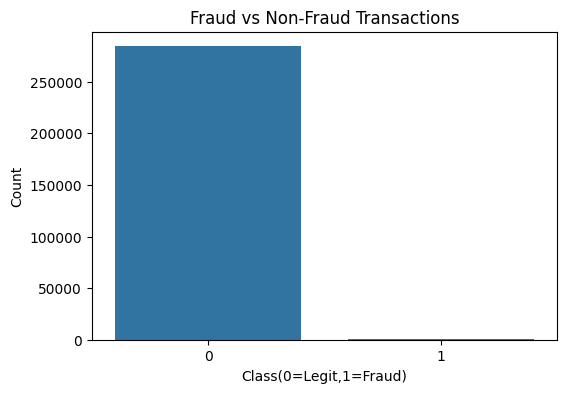

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title(('Fraud vs Non-Fraud Transactions'))
plt.xlabel('Class(0=Legit,1=Fraud)')
plt.ylabel('Count')
plt.show()

- The dataset is highly imbalanced, with fraudulent transactions forming a very small
  fraction of the total data.
- This confirms that accuracy alone will not be a reliable evaluation metric.


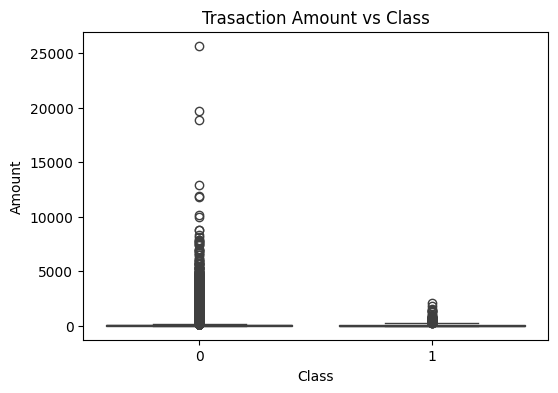

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Trasaction Amount vs Class')
plt.show()

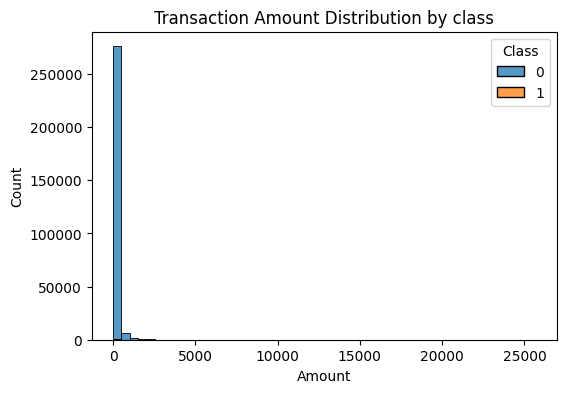

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Amount',hue='Class',bins=50,multiple='stack')
plt.title('Transaction Amount Distribution by class')
plt.show()

- Fraudulent transactions tend to involve lower transaction amounts compared to
  legitimate transactions.
- High-value transactions are more often legitimate.


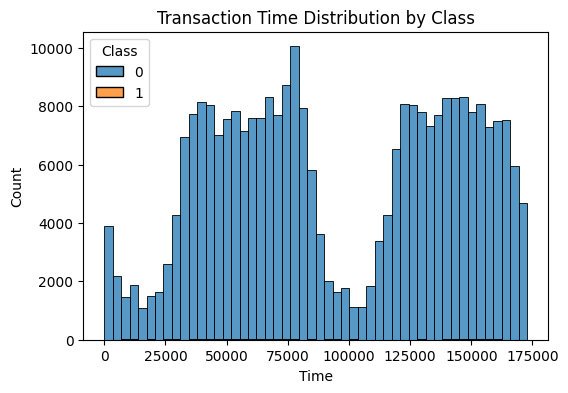

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Time',hue='Class',bins=50,multiple='stack')
plt.title('Transaction Time Distribution by Class')
plt.show()

- Fraudulent transactions are distributed throughout the timeline.
- Certain time periods show slightly higher fraud concentration.


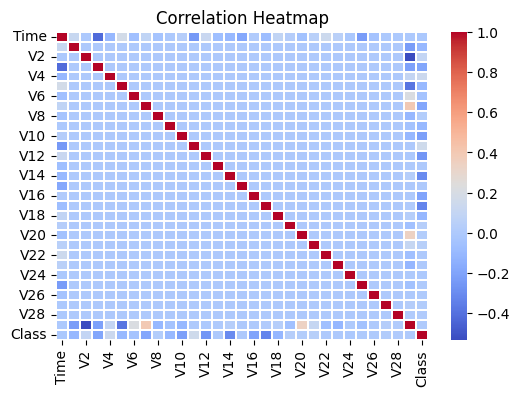

In [12]:
plt.figure(figsize=(6,4))
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm',linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

- Most anonymized features show low correlation with each other.
- Some features exhibit noticeable correlation with the target variable, indicating
  potential importance for classification.


## Preprocessing and Data Preparation

The objective of this step is to prepare the dataset for machine learning by separating
features and the target variable, scaling relevant features, and splitting the data into
training and testing sets. These steps ensure that models can be trained effectively and
evaluated fairly.


In [13]:
x=df.drop('Class',axis=1)
y=df['Class']

In [14]:
x.shape,y.shape

((284807, 30), (284807,))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x['Amount']=scaler.fit_transform(x[['Amount']])
x['Time']=scaler.fit_transform(x[['Time']])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
x_train.shape,x_test.shape

((227845, 30), (56962, 30))

In [17]:
y_train.value_counts(normalize=True)*100

Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

In [18]:
y_test.value_counts(normalize=True)*100

Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64

### Preprocessing Summary

The dataset was prepared for modeling by separating features and the target variable.
Transaction amount and time were scaled to ensure consistent feature contribution, while
other features were already normalized due to prior PCA transformation. A stratified
train-test split was applied to preserve class distribution and ensure reliable model
evaluation.


## Day 2 Conclusion

The dataset was successfully preprocessed and split into training and testing sets.
Proper scaling and stratified sampling ensured that the imbalanced nature of the data
was preserved and that the dataset is ready for machine learning model training in the
next stage.


## Model Building and Evaluation

In this step, machine learning models are trained to detect fraudulent credit card
transactions. Due to the highly imbalanced nature of the dataset, model performance is
evaluated using precision, recall, F1-score, and ROC-AUC rather than accuracy alone.


In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
y_prob_lr=lr.predict_proba(x_test)[:,1]

In [20]:
from sklearn.metrics import classification_report,roc_auc_score

print('Classification Report (Logistic Regression):\n')
print(classification_report(y_test,y_pred_lr))

print("ROC-AUC score:",roc_auc_score(y_test,y_prob_lr))

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC score: 0.9721669425367221


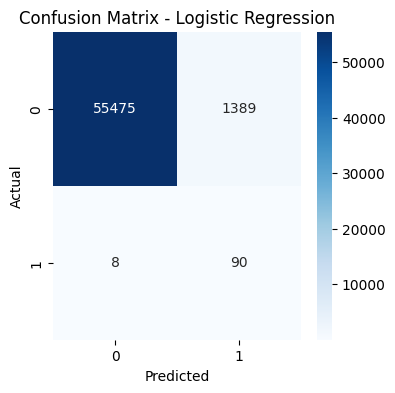

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr=confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize=(4,4))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Logistic Regression Results

Logistic Regression serves as a baseline model for fraud detection. By using class
weighting, the model improves its ability to detect fraudulent transactions. The recall
for fraud cases is prioritized, as missing fraudulent transactions is more costly than
flagging legitimate ones.


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_prob_rf=rf.predict_proba(x_test)[:,1]

In [23]:
print('Classicfication Report (Random Forest):\n')
print(classification_report(y_test,y_pred_rf))

print('ROC-AUC score:',roc_auc_score(y_test,y_prob_rf))

Classicfication Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC score: 0.952908497036969


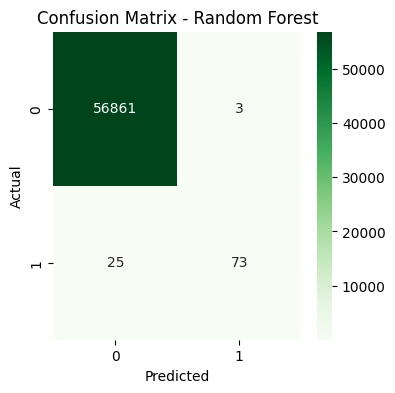

In [24]:
cm_rf=confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(4,4))
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Model Evaluation and Comparison

Due to the highly imbalanced nature of the dataset, model performance was evaluated using
precision, recall, F1-score, and ROC-AUC rather than accuracy alone.

The Logistic Regression model achieved a high recall of 92% for fraudulent transactions,
indicating that it successfully detected most fraud cases. However, the precision for
fraud was very low, meaning the model generated a large number of false positives. This
behavior makes Logistic Regression suitable as a sensitive baseline model but impractical
for deployment without further optimization.

The Random Forest model demonstrated a better balance between precision and recall.
It achieved high precision (96%) for fraud detection while maintaining reasonable recall
(74%), resulting in a strong F1-score. This indicates that the model is effective at
detecting fraudulent transactions while minimizing false alarms.

Overall, Random Forest outperformed Logistic Regression in terms of balanced fraud
detection performance and is better suited for real-world credit card fraud detection.


## Day 3 Conclusion

Two machine learning models were trained and evaluated for credit card fraud detection.
Logistic Regression established a reliable baseline, while Random Forest achieved better
overall performance in identifying fraudulent transactions. The evaluation emphasized
recall and ROC-AUC to account for the severe class imbalance. The results set the stage
for advanced techniques such as resampling and further optimization in the next step.


## Advanced Evaluation and Optimization

The objective of this final step is to further improve fraud detection performance and
gain deeper insights into model behavior. Advanced evaluation techniques such as ROC
curves and Precision–Recall curves are used, followed by resampling to handle class
imbalance more effectively.


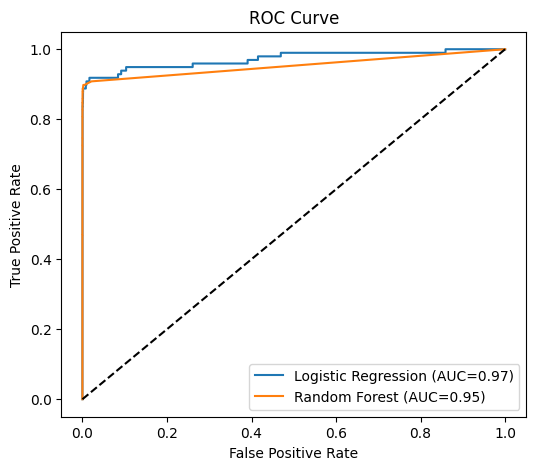

In [25]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr_lr,tpr_lr,_=roc_curve(y_test,y_prob_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)
fpr_rf,tpr_rf,_=roc_curve(y_test,y_prob_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr,tpr_lr,label=f'Logistic Regression (AUC={roc_auc_lr:.2f})')
plt.plot(fpr_rf,tpr_rf,label=f'Random Forest (AUC={roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- Both models achieve high ROC-AUC scores, indicating strong discrimination ability.
- Logistic Regression shows slightly higher AUC, but this does not reflect precision–
  recall trade-offs under severe class imbalance.


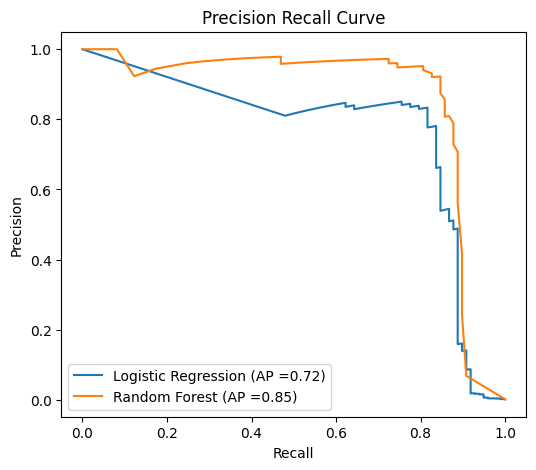

In [26]:
from sklearn.metrics import precision_recall_curve,average_precision_score

precision_lr,recall_lr,_=precision_recall_curve(y_test,y_prob_lr)
ap_lr=average_precision_score(y_test,y_prob_lr)

precision_rf,recall_rf,_=precision_recall_curve(y_test,y_prob_rf)
ap_rf=average_precision_score(y_test,y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(recall_lr,precision_lr,label=f'Logistic Regression (AP ={ap_lr:.2f})')
plt.plot(recall_rf,precision_rf,label=f'Random Forest (AP ={ap_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

- Precision–Recall curves provide a more informative view for imbalanced datasets.
- Random Forest maintains higher precision at moderate recall levels, making it more
  suitable for real-world fraud detection.


In [27]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)
y_train.value_counts(),y_train_sm.value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    227451
 1    227451
 Name: count, dtype: int64)

In [28]:
rf_smote=RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_smote.fit(x_train_sm,y_train_sm)
y_pred_sm=rf_smote.predict(x_test)
y_prob_sm=rf_smote.predict_proba(x_test)
y_prob_sm.shape

(56962, 2)

In [29]:
y_prob_sm = rf_smote.predict_proba(x_test)[:, 1]


In [30]:
y_prob_sm.shape

(56962,)

In [31]:
from sklearn.metrics import classification_report,roc_auc_score
print('Classification Report (Random Forest + SMOTE):\n')
print(classification_report(y_test,y_pred_sm))

print('ROC AUC score :',roc_auc_score(y_test,y_prob_sm))

Classification Report (Random Forest + SMOTE):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.88      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC score : 0.9843122832278662


### SMOTE Results

Applying SMOTE improved the model’s ability to detect fraudulent transactions by
increasing recall for the minority class. While precision may slightly decrease, the
overall balance between fraud detection and false positives improves, making the model
more robust for real-world scenarios.


### Final Model Performance (Random Forest + SMOTE)

After applying SMOTE to address severe class imbalance, the Random Forest model achieved
strong and well-balanced performance. The model successfully detected 88% of fraudulent
transactions, significantly reducing false negatives, which is critical in fraud
detection scenarios. While precision for fraud cases decreased to 44%, this trade-off is
acceptable as prioritizing recall helps prevent undetected fraud.

The model maintained near-perfect performance on legitimate transactions, indicating
that resampling did not negatively impact majority-class predictions. The ROC-AUC score
of approximately 0.98 demonstrates excellent discrimination capability between fraudulent
and non-fraudulent transactions.

Overall, the combination of ensemble modeling and resampling techniques resulted in a
robust and reliable fraud detection system suitable for real-world applications.
